Data loaded. Rows: 1462


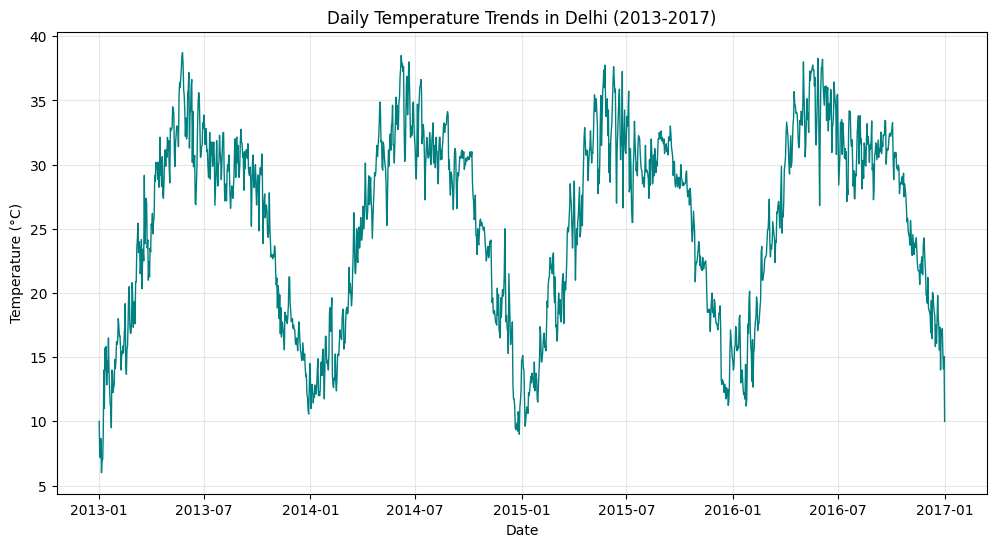


Detected Outliers:
No extreme outliers found.


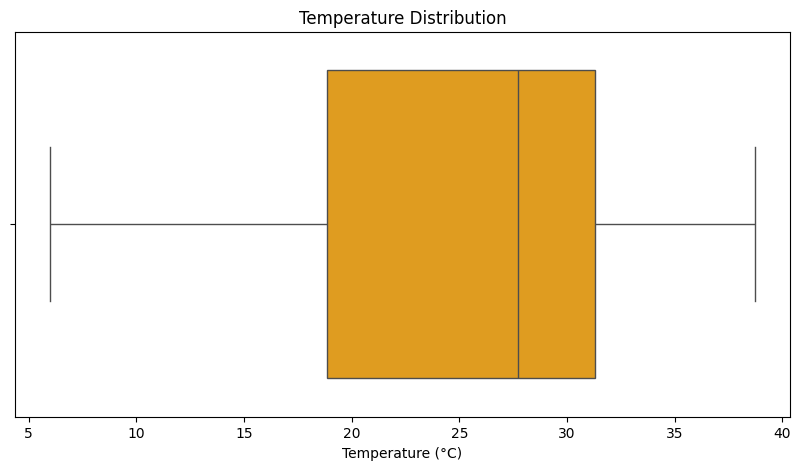

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

filename = 'DailyDelhiClimateTrain.csv'

try:
    df = pd.read_csv(filename)

    df = df.rename(columns={
        'date': 'Date',
        'meantemp': 'Temperature',
        'humidity': 'Humidity',
        'wind_speed': 'WindSpeed'
    })

    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(by='Date')

    print(f"Data loaded. Rows: {len(df)}")

    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Temperature'], color='teal', linewidth=1)
    plt.title('Daily Temperature Trends in Delhi (2013-2017)')
    plt.ylabel('Temperature (°C)')
    plt.xlabel('Date')
    plt.grid(True, alpha=0.3)
    plt.show()

    df['z_score'] = stats.zscore(df['Temperature'])
    outliers = df[np.abs(df['z_score']) > 3]

    print("\nDetected Outliers:")
    if not outliers.empty:
        print(outliers[['Date', 'Temperature', 'z_score']])
    else:
        print("No extreme outliers found.")

    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df['Temperature'], color='orange')
    plt.title('Temperature Distribution')
    plt.xlabel('Temperature (°C)')
    plt.show()

except Exception as e:
    print(f"Error: {e}")